In [1]:
#### Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
#### Reading the data
def read_data():
    data = pd.read_excel("C:/Master Data Scientist/ML/Project/Kmeans_Clustering Project-11/EastWestAirlines.xlsx")
    return data

In [3]:
#### Calling of data
df = read_data()
print(df)

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [4]:
#### Preprocessing and Feature Engineering
df1 = df.copy()
print(df1.head())
print(df1.info())
print(df1.shape)

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 en

In [5]:
print(df1.describe())

               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      

In [6]:
df1.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [7]:
X = df1.drop('ID#',axis=1)

In [8]:
km = KMeans(n_clusters=3)
print(km)

KMeans(n_clusters=3)


In [9]:
km.fit(X)

KMeans(n_clusters=3)

### To chose Best Cluster

In [10]:
# wcss = []
# for i in range(1,45):
#     km = KMeans(n_clusters=i)
#     km.fit(X)
#     wcss.append(km.inertia_)

In [11]:
# plt.plot(range(1,45),wcss)

In [12]:
from math import sqrt
sqrt(3999/2)

44.715769030622745

In [13]:
pred = km.predict(X)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
df1['Cluster'] = pred

In [15]:
df1['Cluster'].value_counts()

0    3211
1     733
2      55
Name: Cluster, dtype: int64

In [16]:
df1.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'Cluster'],
      dtype='object')

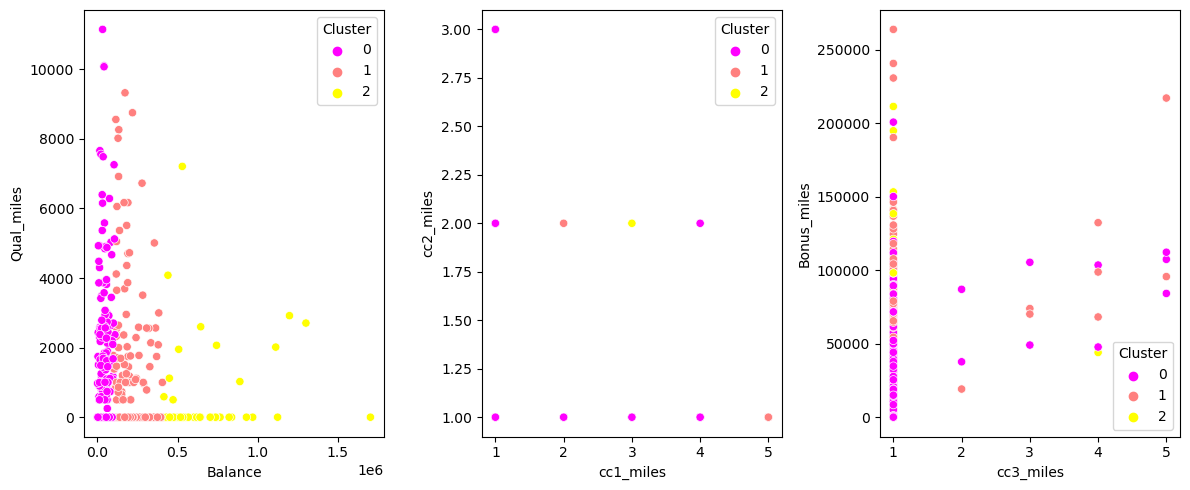

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.scatterplot(data = df1,x = 'Balance' , y = 'Qual_miles' ,hue = 'Cluster',palette='spring' )
plt.subplot(1,3,2)
sns.scatterplot(data = df1,x = 'cc1_miles' , y = 'cc2_miles' ,hue = 'Cluster',palette='spring' )
plt.subplot(1,3,3)
sns.scatterplot(data = df1,x = 'cc3_miles' , y = 'Bonus_miles' ,hue = 'Cluster',palette='spring' )
plt.tight_layout()
plt.show()

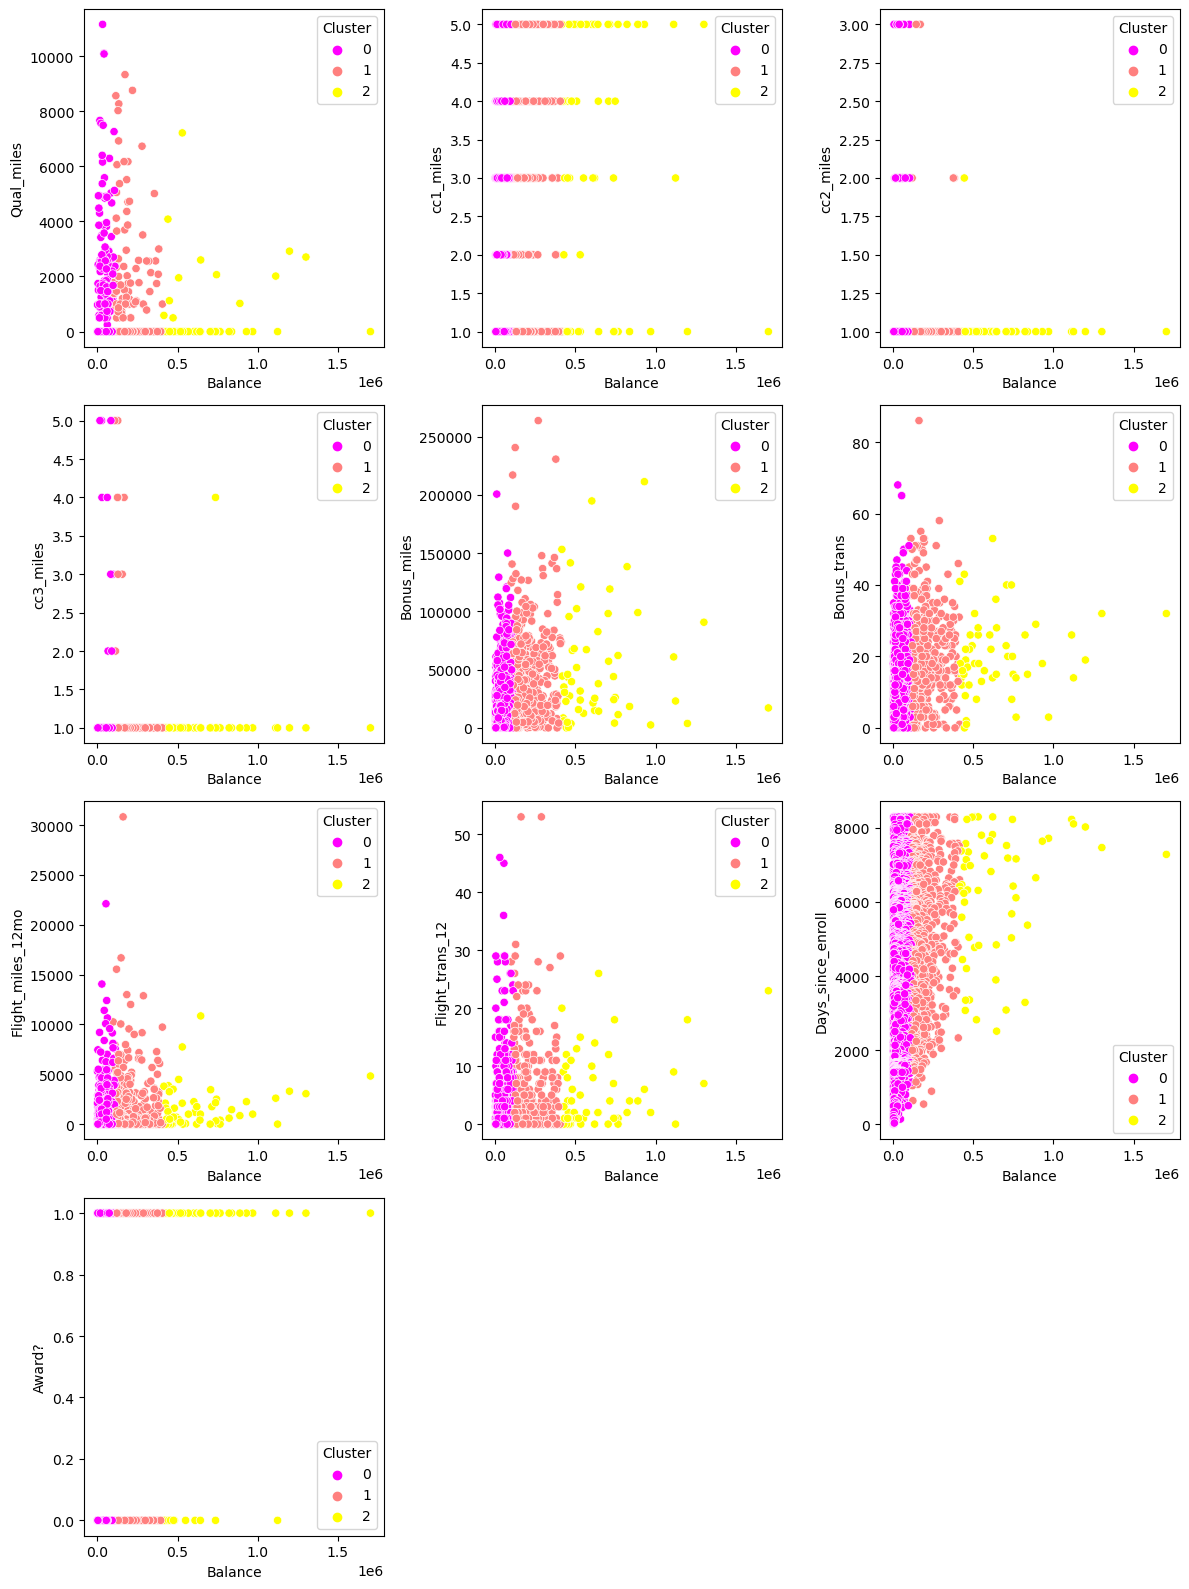

In [18]:
col = [ 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?',]
plt.figure(figsize=(12,16))
for i,cols in enumerate(col,1):
    plt.subplot(4,3,i)
    sns.scatterplot(data=df1,x='Balance',y=cols,hue='Cluster',palette='spring')
plt.tight_layout()
plt.show()